# EMC5235 - Balança Virtual

Bruno M. Pacheco

16100865

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

import seaborn as sns
from scipy.stats import norm

## 3.1 Erro aleatório

### a)

/home/bruno/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


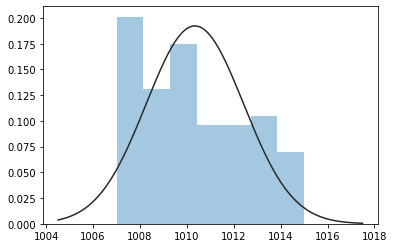

In [2]:
kg_measurements = np.array([1008, 1012, 1008, 1008, 1010, 1010, 1011, 1014, 1008, 1008, 1010, 1010, 1007, 1010, 1011, 1012, 1008, 1010, 1007, 1008, 1008, 1008, 1013, 1009, 1014, 1009, 1010, 1014, 1010, 1011, 1007, 1013, 1008, 1007, 1013, 1012, 1013, 1009, 1011, 1013, 1012, 1013, 1008, 1010, 1015, 1009, 1013, 1009, 1009, 1010, 1008, 1010, 1013, 1013, 1009, 1008, 1012, 1011, 1007, 1014, 1008, 1011, 1010, 1009, 1014, 1012, 1012, 1010, 1010, 1009, 1013, 1012, 1010, 1009, 1009, 1010, 1009, 1009, 1010, 1011, 1009, 1008, 1013, 1012, 1011, 1009, 1010, 1011, 1012, 1010, 1014, 1010, 1013, 1011, 1008, 1011, 1014, 1012, 1007, 1007])

sns.distplot(kg_measurements, hist=True, norm_hist=False, fit=norm, kde=False)
plt.show()

Veja que o eixo vertical está em densidade ao invés de contagem dos valores para que seja comparável com o traço da distribuição normal.

### b)

In [3]:
s = np.std(kg_measurements)
print(f'Desvio padrão: {s:.4f} g')
print(f'')

Desvio padrão: 2.0747 g



In [4]:
# student's t coefficient for 99 (~100) degrees of freedom
student = 2.025

re = s*student

print(f"Repetitividade: {re:.4f} g")

Repetitividade: 4.2013 g


### c)

/home/bruno/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


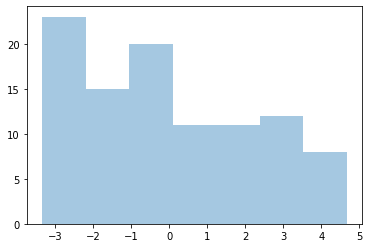

In [5]:
err = kg_measurements - np.mean(kg_measurements)

sns.distplot(err, hist=True, norm_hist=False, kde=False)
plt.show()

In [6]:
p_err = np.sum(np.abs(err) < re) / len(err)

print(f"Percentual de amostras com erro inferior à repetitividade: {100*p_err:.2f}%")

Percentual de amostras com erro inferior à repetitividade: 99.00%


## 3.2 Tendência e correção

### a)

In [7]:
td = np.mean(kg_measurements) - 1000

print(f"Tendência: {td:.4f} g")

print(f"Correção: {-td:.4f} g")

Tendência: 10.3400 g
Correção: -10.3400 g


### b)

In [8]:
kg_measurements = [5017, 5018, 5019, 5017, 5019, 5013, 5016, 5016, 5015, 5020, 5022, 5020, 5018, 5018, 5019, 5017, 5020, 5017, 5019, 5019, 5016, 5017, 5016, 5017, 5021, 5017, 5014, 5021, 5019, 5021, 5022, 5021, 5019, 5021, 5019, 5017, 5015, 5019, 5018, 5019, 5017, 5019, 5023, 5021, 5018, 5019, 5012, 5015, 5017, 5016, 5019, 5018, 5017, 5023, 5021, 5016, 5017, 5017, 5018, 5017, 5018, 5017, 5018, 5022, 5017, 5016, 5019, 5020, 5016, 5021, 5015, 5019, 5016, 5022, 5020, 5017, 5020, 5016, 5014, 5022, 5018, 5020, 5013, 5024, 5021, 5019, 5014, 5013, 5020, 5020, 5018, 5016, 5018, 5014, 5020, 5017, 5017, 5020, 5020, 5015,]

td = np.mean(kg_measurements) - 5000

print('Peso de 5.000 g')
print(f"Tendência: {td:.4f} g")
print(f"Correção: {-td:.4f} g")

Peso de 5.000 g
Tendência: 18.1000 g
Correção: -18.1000 g


São diferentes pois a balança apresenta um comportamento não uniforme nessa faixa de pesos, ou seja, o erro da balança vai variar dependendo da faixa em que se está operando.

In [9]:
kg_meas = {
    100: kg_measurements,
    16: [5020, 5016, 5019, 5019, 5014, 5017, 5017, 5018, 5018, 5019, 5016, 5017, 5023, 5015, 5019, 5019,],
    4: [5014, 5019, 5022, 5014,],
}

for w in kg_meas.keys():
    print(f"{w} medições:")
    print(f"Tendência (incerteza): {np.mean(kg_meas[w]) - 5000:.4f} ({np.std(kg_meas[w]):.4f}) g")
    print('')

100 medições:
Tendência (incerteza): 18.1000 (2.4352) g

16 medições:
Tendência (incerteza): 17.8750 (2.0879) g

4 medições:
Tendência (incerteza): 17.2500 (3.4187) g



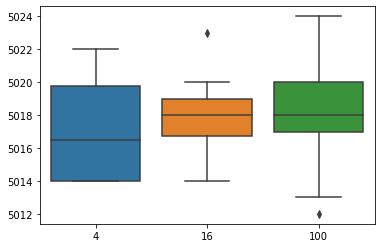

In [10]:
sns.boxplot(data=list(kg_meas.values())[::-1])
plt.xticks(ticks=[0,1,2], labels=[100, 16, 4][::-1])

plt.show()

Vemos que, pela definição dada no enunciado, os valores são consistentes.

## 3.3 Calibração da balança

Deseja-se calibrar a balança para operação dentro da faixa de 0 g à 7000 g, visando, à partir da indicação do display, obter uma estimativa mais precisa do valor medido. Para isso, se utilizará dos pesos de referência, que possuem incerteza muito menor que a da balança, portanto, podendo, portanto, ser desprezada. 14 pontos serão medidos na faixa de operação, em intervalos de 500 g. 20 medições serão feitas para cada ponto de medição.

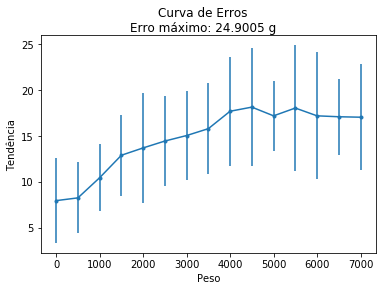

In [36]:
measurements = {
    0: [8, 7, 10, 6, 4, 9, 5, 9, 7, 10, 7, 11, 11, 9, 7, 8, 9, 9, 10, 3,],
    500: [507, 508, 507, 508, 510, 508, 511, 512, 508, 507, 511, 506, 509, 506, 507, 506, 510, 510, 506, 508,],
    1000: [1012, 1013, 1010, 1011, 1010, 1010, 1012, 1009, 1013, 1009, 1008, 1008, 1012, 1010, 1009, 1014, 1008, 1011, 1010, 1010,],
    1500: [1513, 1508, 1516, 1515, 1513, 1515, 1515, 1513, 1516, 1511, 1510, 1514, 1513, 1513, 1510, 1512, 1514, 1512, 1514, 1511,],
    2000: [2015, 2012, 2016, 2012, 2011, 2010, 2011, 2016, 2014, 2013, 2014, 2014, 2013, 2016, 2009, 2014, 2010, 2016, 2017, 2021,],
    2500: [2514, 2512, 2515, 2513, 2517, 2515, 2517, 2510, 2515, 2513, 2518, 2515, 2513, 2518, 2514, 2509, 2514, 2516, 2516, 2515,],
    3000: [3014, 3015, 3018, 3021, 3019, 3015, 3015, 3014, 3011, 3013, 3014, 3016, 3014, 3015, 3015, 3014, 3017, 3012, 3014, 3015,],
    3500: [3520, 3513, 3516, 3514, 3516, 3515, 3515, 3515, 3515, 3515, 3518, 3513, 3521, 3515, 3517, 3515, 3512, 3520, 3515, 3516,],
    4000: [4021, 4017, 4010, 4012, 4018, 4018, 4019, 4019, 4020, 4018, 4018, 4021, 4016, 4014, 4019, 4018, 4018, 4018, 4021, 4019,],
    4500: [4520, 4516, 4518, 4517, 4518, 4519, 4513, 4526, 4525, 4520, 4516, 4516, 4519, 4515, 4517, 4515, 4518, 4518, 4518, 4519,],
    5000: [5016, 5017, 5020, 5018, 5017, 5017, 5016, 5019, 5017, 5015, 5019, 5019, 5016, 5014, 5019, 5013, 5018, 5019, 5017, 5018,],
    5500: [5515, 5523, 5516, 5517, 5516, 5515, 5514, 5515, 5518, 5525, 5520, 5521, 5515, 5519, 5519, 5521, 5516, 5519, 5514, 5523, ],
    6000: [6016, 6017, 6014, 6017, 6013, 6015, 6023, 6017, 6022, 6018, 6017, 6023, 6017, 6013, 6015, 6022, 6016, 6021, 6015, 6013, ],
    6500: [6515, 6521, 6517, 6519, 6513, 6515, 6519, 6516, 6518, 6515, 6517, 6519, 6518, 6515, 6515, 6517, 6517, 6519, 6519, 6518, ],
    7000: [7016, 7018, 7015, 7019, 7015, 7017, 7017, 7019, 7013, 7019, 7012, 7016, 7022, 7019, 7018, 7012, 7020, 7015, 7019, 7020, ],
}

assert all([len(ms)==20 for ms in measurements.values()])

student = 2.140

td_meas = list()
re_meas = list()
w_range = range(0,7000+1,500)
for w in w_range:
    ms = measurements[w]  # measurements

    re_meas.append(np.std(ms) * student)
    td_meas.append(np.mean(ms) - w)

err_max = np.max([re + td for re, td in zip(re_meas, td_meas)])

plt.errorbar(w_range, td_meas, yerr=re_meas, marker='.')
plt.suptitle(f'Curva de Erros\nErro máximo: {err_max:.4f} g')

plt.xlabel('Peso')
plt.ylabel('Tendência')

plt.show()

## 3.4 Determinação de uma massa conhecida

### a)

O valor selecionado foi de 1.250 g.

In [31]:
new_m = 1259

# correction based on the (linear interpolation) from the trends
c = -(td_meas[2] + td_meas[3]) / 2

re = (re_meas[2] + re_meas[3]) / 2

print(f"Massa conhecida (medição única): {new_m + c:.4f} \u00B1{re:.4f} g")

Massa conhecida (medição única): 1247.3250 ±4.0532 g


Vemos que o valor de referência está dentro da faixa que representa a medição.

### b)

In [30]:
new_ms = [1260, 1260, 1264, 1264, 1262, 1263, 1259, 1265, 1260, 1259, 1261, 1260, 1257, 1259, 1261, 1261, 1258, 1262, 1262, 1262, ]

print(f"Massa conhecida (20 medições): {np.mean(new_ms) + c:.4f} \u00B1{re:.4f} g")

Massa conhecida (20 medições): 1246.7171 ±5.2584 g


Valor de referência dentro da faixa resultante.

### c)

In [14]:
new_ms = [1260, 1262, 1258, 1261, 1264, 1266, 1262, 1263, 1257, 1261, 1261, 1261, 1258, 1260, 1259, 1262, 1260, 1261, 1261, 1259, 1259, 1261, 1263, 1261, 1264, 1260, 1264, 1261, 1259, 1259, ]

print(f"Massa conhecida (erro máximo): {np.mean(new_ms):.4f} (+-{err_max:.4f}) g")

Massa conhecida (erro máximo): 1260.9000 (+-24.5798) g


Novamente, dentro da faixa.

### d)

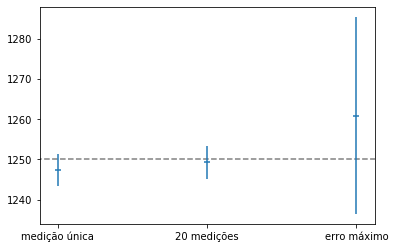

In [15]:
plt.hlines(y=[1250], xmin=-1, xmax=4, linestyle='--', alpha=0.5)
plt.errorbar(x=['medição única', '20 medições', 'erro máximo'], y=[1247.3250, 1249.2750, 1260.9], yerr=[4.0532, 4.0532, 24.5798], fmt='none')
plt.scatter(x=['medição única', '20 medições', 'erro máximo'], y=[1247.3250, 1249.2750, 1260.9], marker='_')
# plt.plot(x=['medição única', '20 medições', 'erro máximo'], y=[1250, 1250, 1250])

plt.show()

São consistentes, mas é visível a desvantagem de utilizar o erro máximo.

## 3.5 Determinação da massa desconhecida

30 medições serão realizadas da massa desconhecida. Os valores da correção e a faixa serão determinados por meio de uma interpolação (linear) da curva de erros a partir da média dos valores indicados.

In [50]:
unk_meas = [2358, 2353, 2362, 2358, 2357, 2353, 2352, 2354, 2354, 2354, 2359, 2354, 2354, 2355, 2352, 2354, 2361, 2354, 2356, 2354, 2353, 2358, 2351, 2357, 2356, 2357, 2354, 2358, 2354, 2352, ]

avg = np.mean(unk_meas)

meas_i = int(avg / 500)

td = (avg / 500 - meas_i) * (td_meas[meas_i + 1] - td_meas[meas_i]) + td_meas[meas_i]
c = - td

re = (avg / 500 - meas_i) * (re_meas[meas_i + 1] - re_meas[meas_i]) + re_meas[meas_i]

print(f"Medição: {avg + c:.0f} \u00B1{re:.0f} g")

Medição: 2341 ±5 g


## 3.6 Determinação da soma de massas

### a)

In [49]:
sum_meas = [3165, 3169, 3162, 3165, 3168, 3165, 3170, 3167, 3166, 3166, 3168, 3162, 3161, 3165, 3165, 3163, 3164, 3163, 3167, 3163, 3165, 3166, 3164, 3162, 3166, 3166, 3165, 3166, 3164, 3168, ]

avg = np.mean(sum_meas)

meas_i = int(avg / 500)

td = (avg / 500 - meas_i) * (td_meas[meas_i + 1] - td_meas[meas_i]) + td_meas[meas_i]
c = - td

re = (avg / 500 - meas_i) * (re_meas[meas_i + 1] - re_meas[meas_i]) + re_meas[meas_i]

m1 = avg + c
u1 = re

print(f"Medição: {m1:.0f} \u00B1{u1:.0f} g")

Medição: 3150 ±5 g


In [48]:
int(avg / 500)

6

### b)

In [51]:
sum_meas = [2916, 2917, 2915, 2916, 2915, 2914, 2918, 2917, 2916, 2915, 2915, 2916, 2919, 2916, 2918, 2918, 2915, 2918, 2917, 2914, 2917, 2916, 2916, 2917, 2917, 2912, 2919, 2914, 2918, 2918, ]

avg = np.mean(sum_meas)

meas_i = int(avg / 500)

td = (avg / 500 - meas_i) * (td_meas[meas_i + 1] - td_meas[meas_i]) + td_meas[meas_i]
c = - td

re = (avg / 500 - meas_i) * (re_meas[meas_i + 1] - re_meas[meas_i]) + re_meas[meas_i]

m2 = avg + c
u2 = re

print(f"Medição: {m2:.0f} \u00B1{u2:.0f} g")

Medição: 2901 ±5 g


### c)

In [34]:
m = m1 + m2
u = np.sqrt(u1**2 + u2**2)

print(f"Soma: {m:.0f} \u00B1{u:.0f} g")

Soma: 6049 ±7 g


### d)

In [52]:
sum_meas = [6070, 6068, 6072, 6067, 6067, 6066, 6068, 6068, 6070, 6064, 6072, 6060, 6070, 6069, 6061, 6068, 6071, 6068, 6067, 6073, 6066, 6071, 6067, 6073, 6067, 6071, 6069, 6069, 6067, 6067, ]

avg = np.mean(sum_meas)

meas_i = int(avg / 500)

td = (avg / 500 - meas_i) * (td_meas[meas_i + 1] - td_meas[meas_i]) + td_meas[meas_i]
c = - td

re = (avg / 500 - meas_i) * (re_meas[meas_i + 1] - re_meas[meas_i]) + re_meas[meas_i]

m = avg + c
u = re

print(f"Medição: {m:.0f} \u00B1{u:.0f} g")

Medição: 6051 ±7 g


São resultados bastante próximos.